In [116]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

data_merged_unfinished = pd.merge(study_results, mouse_metadata,  on= 'Mouse ID' , how= 'outer' )
# Display the data table for preview
# display(mouse_metadata)
# display(study_results)
data_merged_unfinished

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [117]:
# Checking the number of mice.
mice_count = len(data_merged_unfinished['Mouse ID'].unique())
mice_count

249

In [118]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_data_unfinished = data_merged_unfinished.duplicated(subset=['Mouse ID', 'Timepoint'] , keep=False)
duplicated_data_finished = data_merged_unfinished[duplicated_data_unfinished]
duplicated_data_finished_by_id = data_merged_unfinished['Mouse ID'].unique()
display(duplicated_data_finished)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [119]:
# Create a clean DataFrame by dropping the duplicate mouse by it ID.
unique_data = data_merged_unfinished.drop_duplicates(subset=['Mouse ID'])
unique_data = unique_data.reset_index(drop= True)
unique_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [120]:
# Checking the number of mice in the clean DataFrame.
mice_count_clean=len(unique_data)
mice_count_clean

249

In [121]:
#using gropby method
regimen_grouped_data = data_merged_unfinished.groupby('Drug Regimen')
regimen_grouped_data


In [122]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean_tumor_volume = regimen_grouped_data['Tumor Volume (mm3)'].mean()
median_tumor_volume = regimen_grouped_data['Tumor Volume (mm3)'].median()
variance_tumor_volume = regimen_grouped_data['Tumor Volume (mm3)'].var()
std_dev_tumor_volume = regimen_grouped_data['Tumor Volume (mm3)'].std()
sem_tumor_volume = regimen_grouped_data['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame
summary_statistics = pd.DataFrame({'Mean Tumor Volume': mean_tumor_volume,
                              'Median Tumor Volume': median_tumor_volume,
                              'Tumor Volume Variance': variance_tumor_volume,
                              'Tumor Volume Std. Dev.': std_dev_tumor_volume,
                              'Tumor Volume SEM': sem_tumor_volume})
display(summary_statistics)



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [123]:
# Using the aggregation method, produce the same summary statistics in a single line.
summary_statistics_aggregation = regimen_grouped_data['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_statistics_aggregation

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


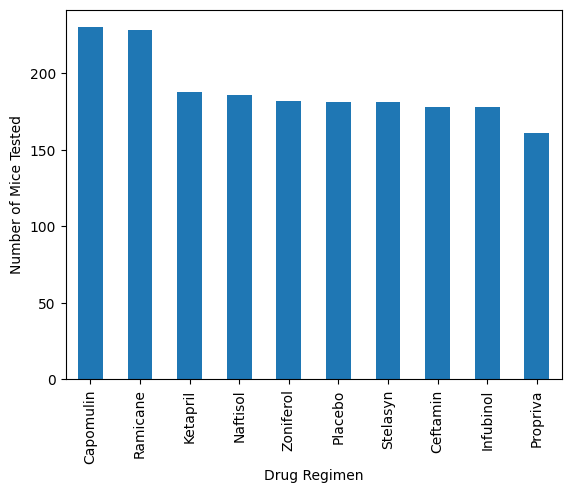

In [124]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
#counting the timepoints in the grouped data 
timepoints_count = regimen_grouped_data['Timepoint'].count()
timepoints_count_sorted = timepoints_count.sort_values(ascending=False)
#creating bar blot
timepoints_count_sorted.plot(kind='bar', xlabel='Drug Regimen', ylabel='Number of Mice Tested')
plt.show()

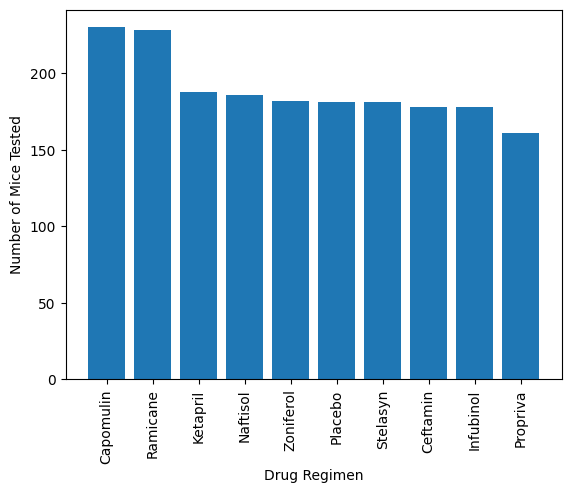

In [125]:
# creating a plot using pyplot
plt.bar(timepoints_count_sorted.index, timepoints_count_sorted.values)

#labels for x-axis and y-axis
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')

#rotating the x-axis labels
plt.xticks(rotation=90)

plt.show()



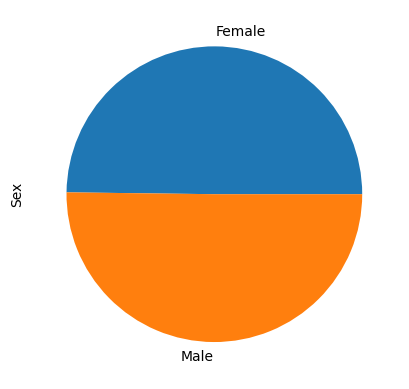

In [136]:
# Group the merged_data DataFrame by the 'Sex' column and count the number of unique mice
sex_distribution = unique_data.groupby('Sex')['Mouse ID'].nunique()

# Create a pie plot using Pandas
sex_distribution.plot(kind='pie')

# Remove the y-axis label
plt.ylabel('Sex')

# Display the plot
plt.show()


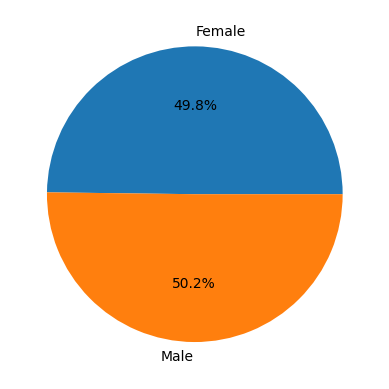

In [139]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_distribution.values, labels=sex_distribution.index, autopct='%1.1f%%')

plt.show()